In [1]:
import matplotlib.pylab as plt
import numpy as np
plt.style.use("/afs/ihep.ac.cn/users/l/luoxj/Style/Paper.mplstyle")
%config InlineBackend.figure_format = 'svg'
import sys
sys.path.append("/afs/ihep.ac.cn/users/l/luoxj/root_tool/python_script/")

from copy import copy
path_base = "/afs/ihep.ac.cn/users/l/luoxj/sk_psd/jobs_DSNB_sk_data/"
v_path = ["data_dE_dx_dependent_only_QEL",
          "data_three_components_only_QEL",
          "data_20210329_withpdg",
          "data_20210921_four_components"]
dir_events_diff_options = {}
for path_option in v_path:
    full_path = path_base+path_option
    dir_events = {}
    with np.load(f"{full_path}/11.npz", allow_pickle=True) as f:
        for key in f.files:
            dir_events[key] = f[key]
        print(path_option+":\n",dir_events.keys())
    dir_events_diff_options[path_option] = copy(dir_events)

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-ycw3rmbz because the default path (/afs/ihep.ac.cn/users/l/luoxj/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.
Matplotlib is building the font cache; this may take a moment.


data_dE_dx_dependent_only_QEL:
 dict_keys(['sig_NoWeightE', 'sig_WeightE', 'bkg_NoWeightE', 'bkg_WeightE', 'sig_vertex', 'bkg_vertex', 'sig_equen', 'bkg_equen', 'bkg_pdg', 'bkg_px', 'bkg_py', 'bkg_pz'])
data_three_components_only_QEL:
 dict_keys(['sig_NoWeightE', 'sig_WeightE', 'bkg_NoWeightE', 'bkg_WeightE', 'sig_vertex', 'bkg_vertex', 'sig_equen', 'bkg_equen', 'bkg_pdg', 'bkg_px', 'bkg_py', 'bkg_pz'])
data_20210329_withpdg:
 dict_keys(['sig_NoWeightE', 'sig_WeightE', 'bkg_NoWeightE', 'bkg_WeightE', 'sig_vertex', 'bkg_vertex', 'sig_equen', 'bkg_equen', 'bkg_pdg', 'bkg_px', 'bkg_py', 'bkg_pz', 'bkg_x_init', 'bkg_y_init', 'bkg_z_init', 'bkg_x_nosmear', 'bkg_y_nosmear', 'bkg_z_nosmear'])
data_20210921_four_components:
 dict_keys(['sig_NoWeightE', 'sig_WeightE', 'bkg_NoWeightE', 'bkg_WeightE', 'sig_vertex', 'bkg_vertex', 'sig_equen', 'bkg_equen', 'bkg_pdg', 'bkg_px', 'bkg_py', 'bkg_pz'])


In [2]:
bins_hist = np.array([-19, -18, -17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6,
             7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46,
             48, 50, 52, 54, 56, 58, 60, 62, 66, 72, 80, 90, 102, 116, 132, 150, 170, 192, 216, 242, 270, 300, 332, 366,
             402, 440, 480, 522, 566, 612, 660, 710, 762, 816])
bins_width = np.diff(bins_hist)
bins_center = (bins_hist[1:]+bins_hist[:-1])/2

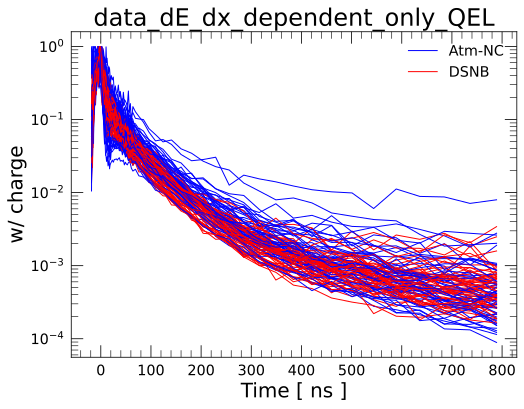

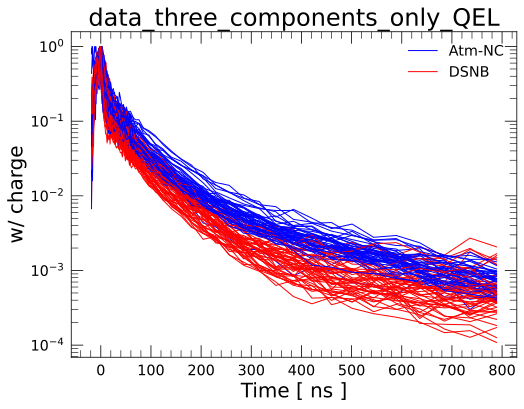

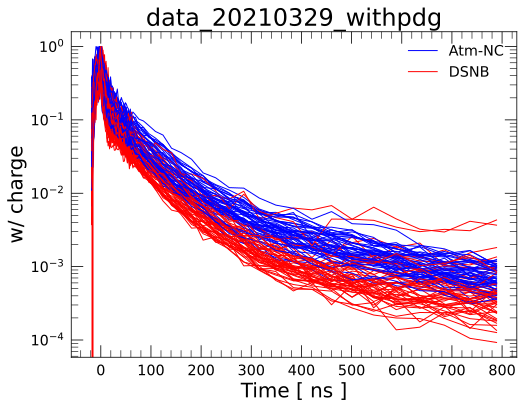

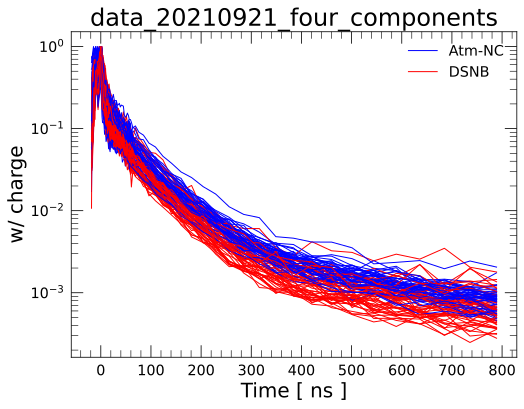

In [8]:
n_events_to_get_mean = 10
for option in dir_events_diff_options.keys():
    dir_events = dir_events_diff_options[option]
    plt.figure()
    # plt.plot(bins_center, np.mean(dir_events["bkg_NoWeightE"][:n_events_to_get_mean], axis=0)[0]/bins_width)
    # plt.plot(bins_center, np.mean(dir_events["sig_NoWeightE"][:n_events_to_get_mean], axis=0)[0]/bins_width)
    # plt.xlabel("Time [ ns ]")
    index_bkg = (12<dir_events["bkg_equen"])&(30>dir_events["bkg_equen"])
    for i in range(50):
        if i == 0:
            plt.plot(bins_center,dir_events["bkg_WeightE"][index_bkg][i][0]/bins_width, linewidth=1, color="blue",label="Atm-NC")
            plt.plot(bins_center,dir_events["sig_WeightE"][i][0]/bins_width, linewidth=1, color="red",label="DSNB")
        else:
            plt.plot(bins_center,dir_events["bkg_WeightE"][index_bkg][i][0]/bins_width, linewidth=1, color="blue",)
            plt.plot(bins_center,dir_events["sig_WeightE"][i][0]/bins_width, linewidth=1, color="red")
    plt.legend()
    plt.semilogy()
    plt.xlabel("Time [ ns ]")
    plt.ylabel("w/ charge")
    plt.title(option)
    plt.savefig("/afs/ihep.ac.cn/users/l/luoxj/sk_psd/jobs_DSNB_sk_data/figure/time_profile_"+option+".png")